In [1]:
import datetime
from time import sleep
import random
import gc
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 貝萊德世界科技基金A2美元
# 直接抓內部API

# 讀取最新資料日期
df = pd.read_csv('貝萊德世界科技基金A2美元歷史淨值.csv')
latest = df.iloc[-1,0]
del df
gc.collect()

option = webdriver.ChromeOptions()
option.add_argument('--headless')
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = webdriver.Chrome(options=option)
driver.maximize_window()

count = 0
fund_history_price = {}

for i in tqdm(range(1, 4)):  # 每頁10個工作天，先觀察自己需要幾頁，或是寫排程每天跑
    url = f'https://fund.api.cnyes.com/fund/api/v1/funds/B09%2C005/nav?format=table&page={i}'
    driver.get(url)
    re = driver.page_source
    alldata = re.split('[')[1].split(']')[0].split('{')
    del alldata[0]

    for i in range(len(alldata)):
        count += 1
        data = alldata[i].split(':')
        date = str(datetime.date.fromtimestamp(int(data[1].split(',')[0])))
        price = data[2].split(',')[0]
        change = 0 if data[3].split(',')[0] == 'null' else data[3].split(',')[0]
        change_rate = 0 if data[4].split('}')[0] == 'null' else data[4].split('}')[0]

        # 如果網頁上的資料比最新資料還要新就抓
        if date > latest:
            fund_history_price[count] = [date, price, change, change_rate]
        else:
            break

    sleep(0.1 + random.random())

driver.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.36it/s]


In [3]:
# 將數據寫入csv
df = pd.DataFrame(fund_history_price).transpose()
df.rename(columns={0:'日期' , 1:'淨值' , 2:'漲跌', 3:'漲跌幅'}, inplace=True)
df = df.sort_values(by=['日期'], ascending=True)

# 寫入csv
df.to_csv('貝萊德世界科技基金A2美元歷史淨值.csv', header=0, index=0, mode='a')

KeyError: '日期'

In [5]:
## 視覺化
# 讀取歷史淨值csv
# %matplotlib inline

df = pd.read_csv(r'./\貝萊德世界科技基金A2美元歷史淨值.csv', header=0)

df['日期'] = pd.to_datetime(df['日期'], format='%Y-%m-%d')


<AxesSubplot:title={'center':'貝萊德世界科技基金A2美元歷史淨值'}, xlabel='日期', ylabel='單位淨值'>

C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33802 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19990 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hchbi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31185 missing from c

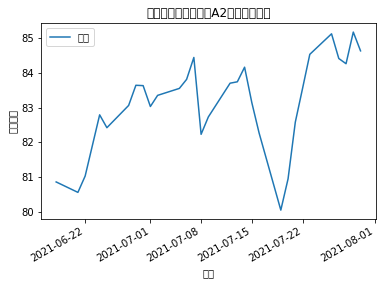

In [6]:
df[-30:].plot(x='日期',
              y='淨值',
              ylabel='單位淨值',
              xlabel='日期',
              title='貝萊德世界科技基金A2美元歷史淨值')
